In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset.csv to Netflix Dataset.csv


In [5]:
df = pd.read_csv('Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [7]:

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


df['Year'] = df['Release_Date'].dt.year


df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")


df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

print("After Cleaning:")
print(df.isnull().sum())
print("\nSample Cleaned Data:")
print(df[['Title', 'Director', 'Country', 'Year', 'Main_Genre']].head())


After Cleaning:
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    98
Rating           0
Duration         0
Type             0
Description      0
Year            98
Main_Genre       0
dtype: int64

Sample Cleaned Data:
   Title           Director        Country    Year              Main_Genre
0     3%            Unknown         Brazil  2020.0  International TV Shows
1  07:19  Jorge Michel Grau         Mexico  2016.0                  Dramas
2  23:59       Gilbert Chan      Singapore  2018.0           Horror Movies
3      9        Shane Acker  United States  2017.0      Action & Adventure
4     21     Robert Luketic  United States  2020.0                  Dramas


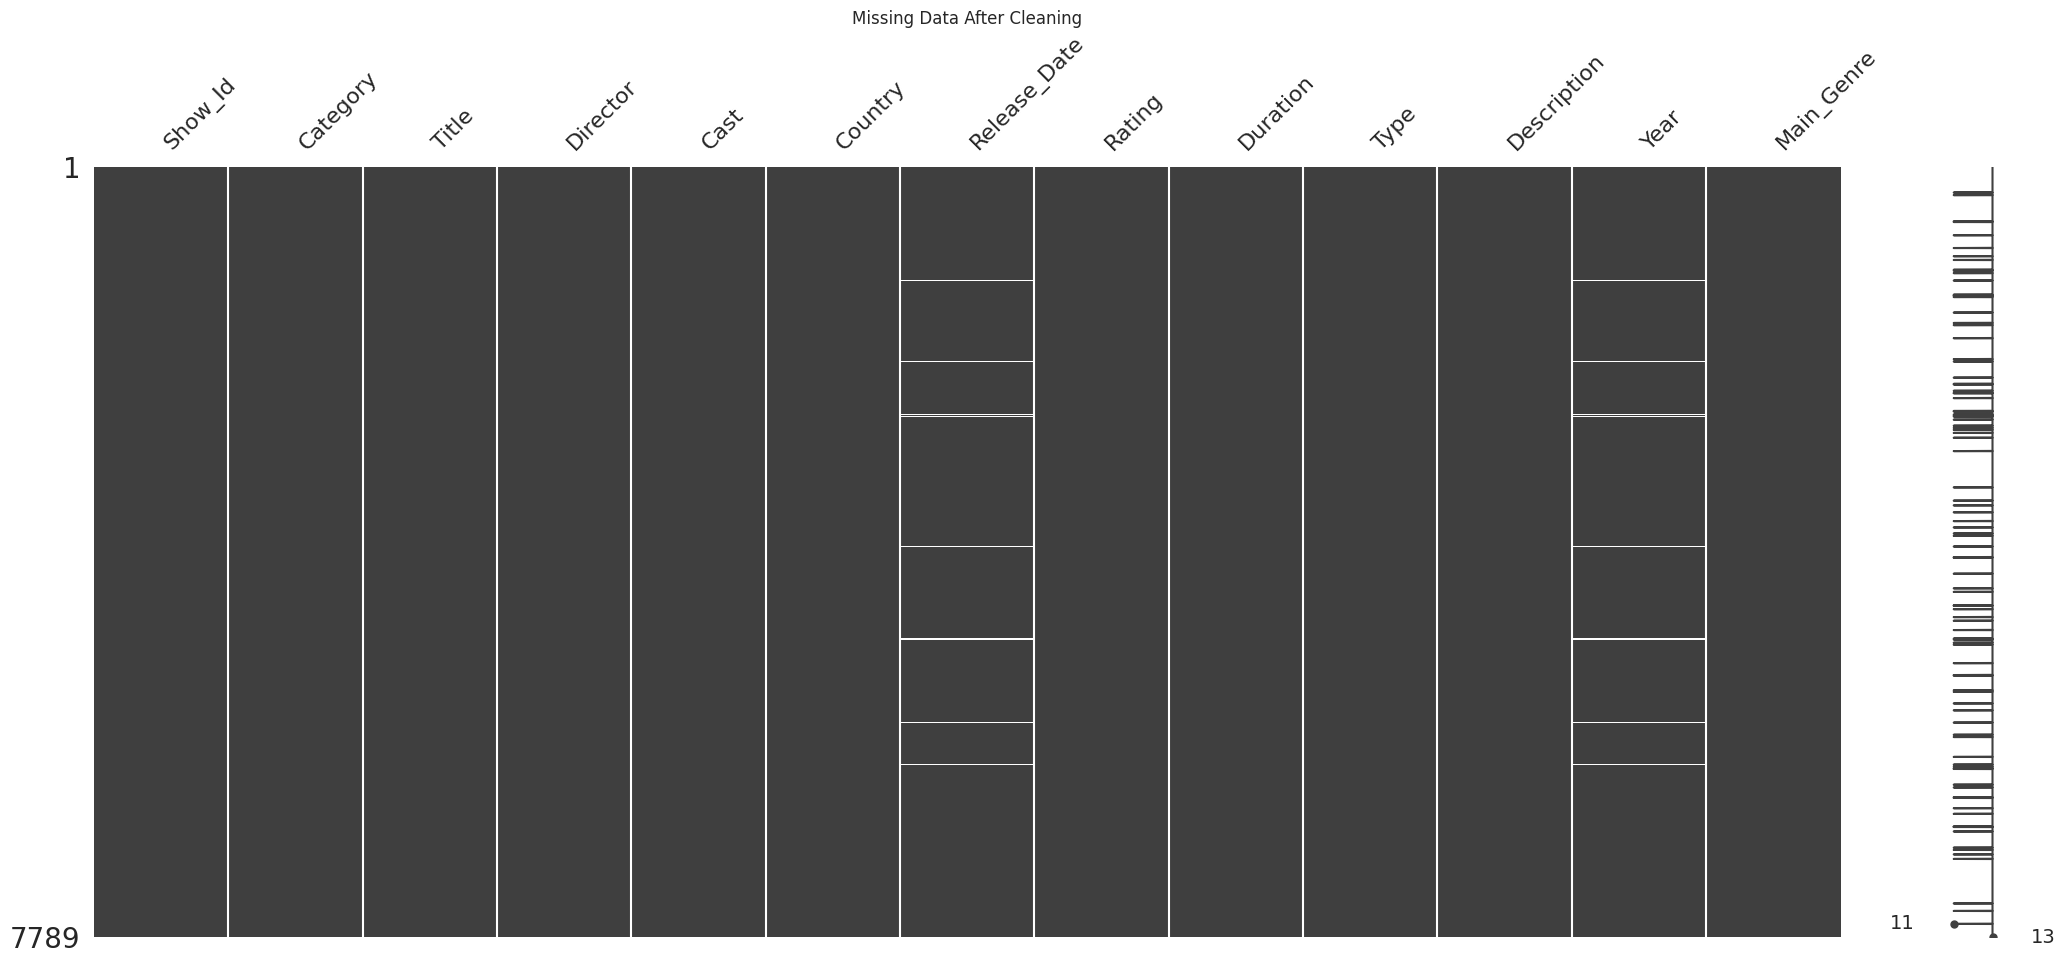

In [9]:
import missingno as msno


msno.matrix(df)
plt.title("Missing Data After Cleaning")
plt.show()

In [10]:
print("\nCategory Distribution:\n", df['Category'].value_counts())


Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [11]:
print("\nTop 5 Countries with Most Netflix Titles:\n", df['Country'].value_counts().head(5))


Top 5 Countries with Most Netflix Titles:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [12]:
print("\nDataset covers years from", int(df['Year'].min()), "to", int(df['Year'].max()))



Dataset covers years from 2008 to 2021


In [13]:
print("\nContent Rating Distribution:\n", df['Rating'].value_counts().head(10))


Content Rating Distribution:
 Rating
TV-MA    2865
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
Name: count, dtype: int64


In [14]:
print("\nStatistical Summary:\n", df.describe(include='all'))


Statistical Summary:
        Show_Id Category              Title Director     Cast        Country  \
count     7789     7789               7789     7789     7789           7789   
unique    7787        2               7787     4051     6832            682   
top      s6621    Movie  The Lost Okoroshi  Unknown  Unknown  United States   
freq         2     5379                  2     2388      718           2556   
mean       NaN      NaN                NaN      NaN      NaN            NaN   
min        NaN      NaN                NaN      NaN      NaN            NaN   
25%        NaN      NaN                NaN      NaN      NaN            NaN   
50%        NaN      NaN                NaN      NaN      NaN            NaN   
75%        NaN      NaN                NaN      NaN      NaN            NaN   
max        NaN      NaN                NaN      NaN      NaN            NaN   
std        NaN      NaN                NaN      NaN      NaN            NaN   

                         Rel

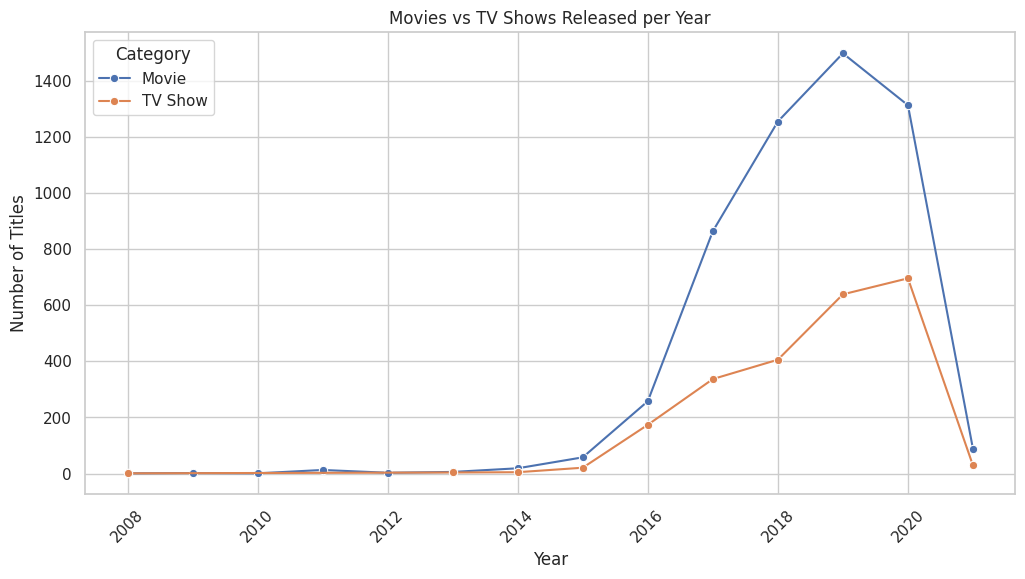

In [15]:
import matplotlib.ticker as ticker

#Line Chart – Movies vs TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

/tmp/ipython-input-1207557043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


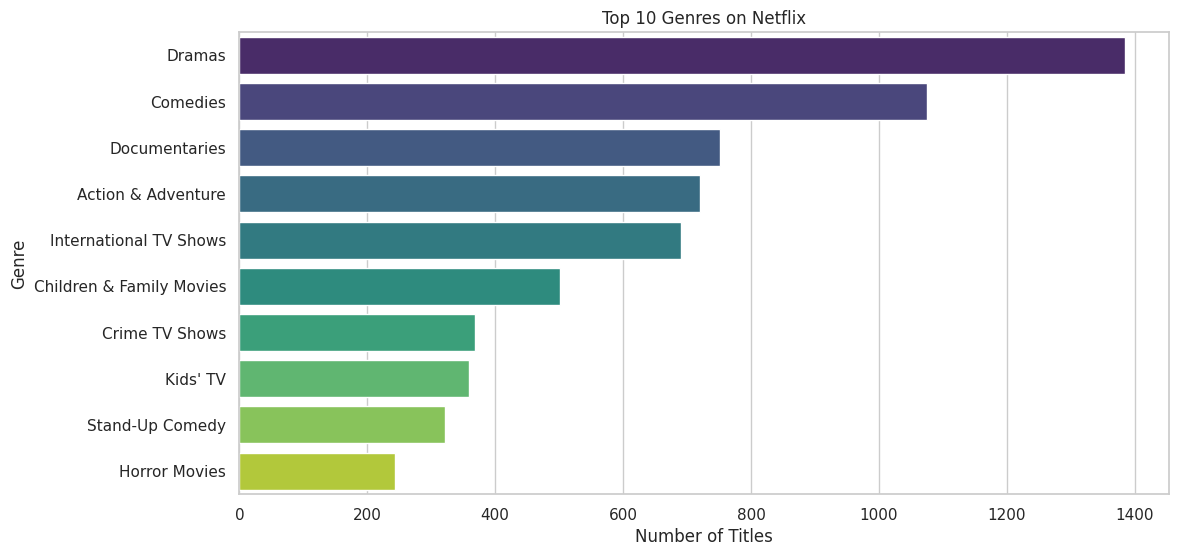

In [16]:
# Bar Chart – Top 10 Main Genres
top_genres = df['Main_Genre'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

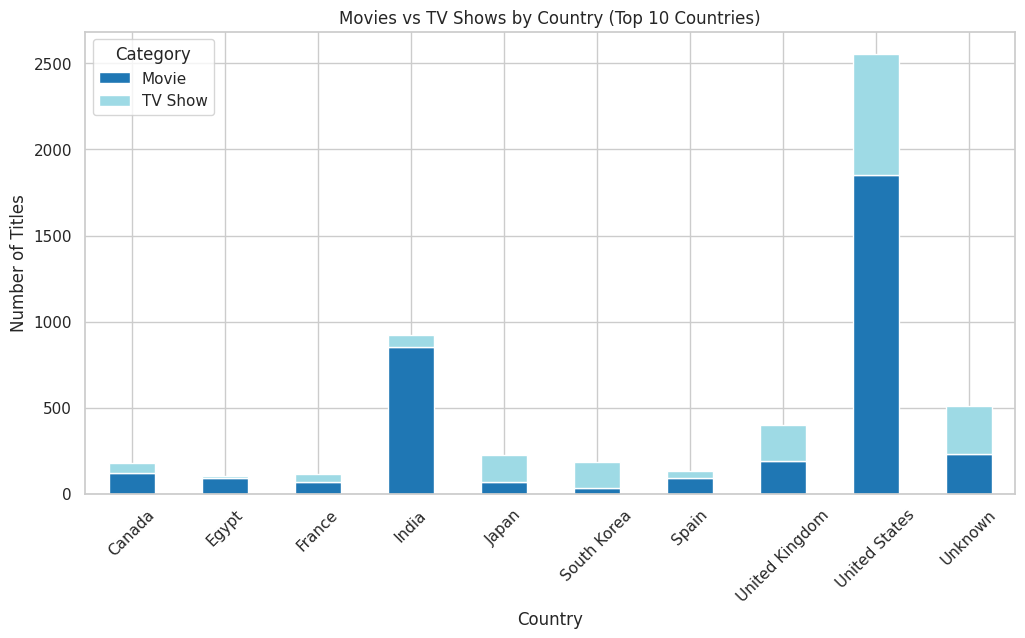

In [17]:
# Stacked Bar Chart – Movies vs TV Shows by Top 10 Countries
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [19]:
#Choropleth Map – Country-wise Netflix Content
import plotly.express as px

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Count",
                    hover_name="Country",
                    color_continuous_scale="viridis",
                    title="Netflix Content by Country")
fig.show()

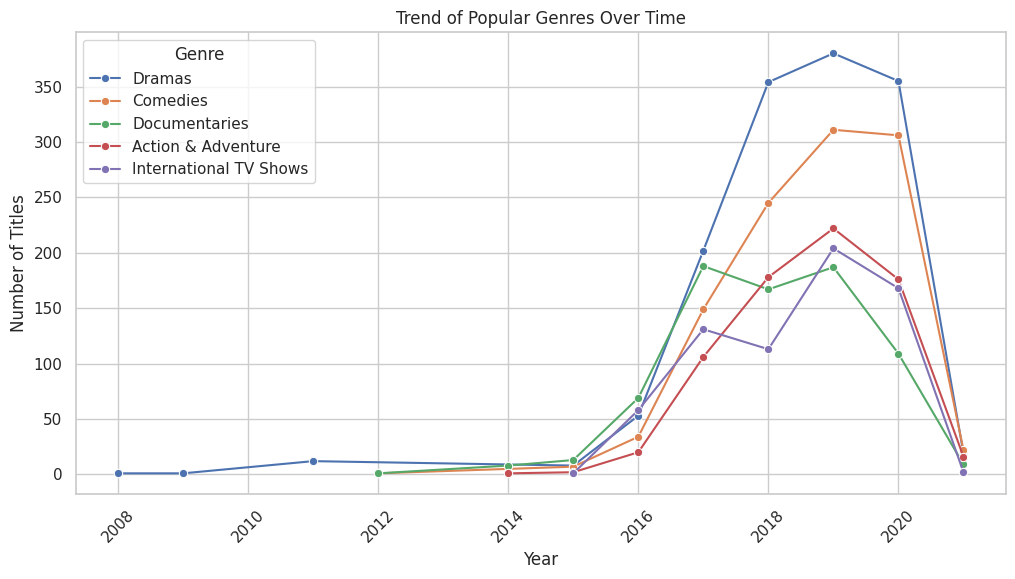

In [20]:
#Line Chart – Trend of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.show()